# 超幾何分布

## 概要

**超幾何分布**（hypergeometric distribution）は、有限母集団から非復元抽出（without replacement）を行ったときの成功回数の分布である。

二項分布が復元抽出（各試行が独立）を仮定するのに対し、超幾何分布は非復元抽出を扱うため、試行間に依存性がある。母集団が十分大きいとき二項分布で近似できる。品質検査やフィッシャーの正確検定など、統計学において重要な役割を果たす。

## 確率質量関数

母集団のサイズ$N$、そのうち成功状態の個体数$K$、抽出数$n$のとき、成功回数$X=k$となる確率は

$$
P(X=k \mid N, K, n) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}
$$

ただし$\max(0, n+K-N) \leq k \leq \min(n, K)$

- $N$: 母集団のサイズ
- $K$: 母集団における成功状態の個体数
- $n$: 抽出する個体数

分子は「$K$個の成功個体から$k$個を選ぶ場合の数」と「$N-K$個の失敗個体から$n-k$個を選ぶ場合の数」の積であり、分母は「$N$個から$n$個を選ぶ場合の総数」である。

## 累積分布関数

$$
F(k) = P(X \leq k) = \sum_{i=0}^{k} \frac{\binom{K}{i}\binom{N-K}{n-i}}{\binom{N}{n}}
$$

閉じた形の表現はない。

## 期待値・分散

$$
E[X] = n\frac{K}{N}
$$

$$
V[X] = n\frac{K}{N}\frac{N-K}{N}\frac{N-n}{N-1}
$$

二項分布$B(n, K/N)$の分散$n \cdot \frac{K}{N} \cdot \frac{N-K}{N}$に補正係数$\frac{N-n}{N-1}$が掛かっている。この補正係数は **有限母集団修正（finite population correction）** と呼ばれ、非復元抽出による分散の減少を反映している。$N \gg n$のとき補正係数は$1$に近づき、二項分布の分散と一致する。

## 図

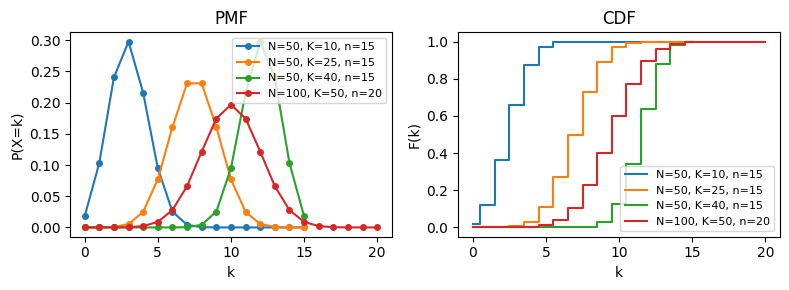

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import hypergeom

fig, axes = plt.subplots(1, 2, figsize=[8, 3])

# (N, K, n)
params = [(50, 10, 15), (50, 25, 15), (50, 40, 15), (100, 50, 20)]
for N, K, n in params:
    k = np.arange(0, n + 1)
    pmf = hypergeom.pmf(k, M=N, n=K, N=n)
    axes[0].plot(k, pmf, 'o-', markersize=4, label=f"N={N}, K={K}, n={n}")

    cdf = hypergeom.cdf(k, M=N, n=K, N=n)
    axes[1].step(k, cdf, where='mid', label=f"N={N}, K={K}, n={n}")

axes[0].set(title="PMF", xlabel="k", ylabel="P(X=k)")
axes[0].legend(fontsize=8)
axes[1].set(title="CDF", xlabel="k", ylabel="F(k)")
axes[1].legend(fontsize=8)
fig.tight_layout()

## 性質

- **二項分布との関係**: $N \to \infty$かつ$K/N \to p$（一定）のとき、超幾何分布は二項分布$B(n, p)$に収束する。母集団が十分大きければ、非復元抽出と復元抽出の差は無視できる
- **対称性**: $\text{Hypergeometric}(N, K, n)$における$k$の分布は、$\text{Hypergeometric}(N, n, K)$における$k$の分布と等しい（抽出数と成功個体数の役割を交換できる）
- **フィッシャーの正確検定**: 2×2分割表の検定において、周辺度数を固定したもとでのセル度数の条件付き分布は超幾何分布に従う

## 応用例

- 品質検査における抜き取り検査（ロットから非復元で抽出した標本中の不良品数）
- フィッシャーの正確検定（小標本の分割表検定）
- 生態学における捕獲再捕獲法による個体数推定
- 宝くじ・カードゲームにおける当選確率の計算